# Assignment1
#### Deep Learning, prof. Choi

## Import Libraries

In [1]:
import numpy as numpy
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

## Prepare datasets

In [2]:
x_train = torch.FloatTensor([[3.8, 700, 80, 50],
                             [3.2, 650, 90, 30],
                             [3.7, 820, 70, 40],
                             [4.2, 830, 50, 70],
                             [2.6, 550, 90, 60],
                             [3.4, 910, 30, 40],
                             [4.1, 990, 70, 20],
                             [3.3, 870, 60, 60],
                             [3.9, 650, 80, 50]
                            ])
y_train = torch.FloatTensor([[85], [80], [78], [87], [85], [70], [81], [88], [84]])

In [3]:
W = torch.zeros([4, 1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## Train model

In [4]:
optimizer = optim.SGD([W, b], lr=1e-6)

num_epochs = 10000
costs = []
for epoch in range(num_epochs):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())

    if epoch % (num_epochs // 10) == 0:  # 10번만 출력
        print(f"Epoch {epoch}/{num_epochs} - Cost: {cost.item()}")

Epoch 0/10000 - Cost: 6751.5556640625
Epoch 1000/10000 - Cost: 14.346466064453125
Epoch 2000/10000 - Cost: 4.187704563140869
Epoch 3000/10000 - Cost: 2.96061635017395
Epoch 4000/10000 - Cost: 2.610428810119629
Epoch 5000/10000 - Cost: 2.4937002658843994
Epoch 6000/10000 - Cost: 2.4541242122650146
Epoch 7000/10000 - Cost: 2.4406306743621826
Epoch 8000/10000 - Cost: 2.435948610305786
Epoch 9000/10000 - Cost: 2.434258222579956


## Plot the graph

### Learning rate with cost

### Epoch with cost

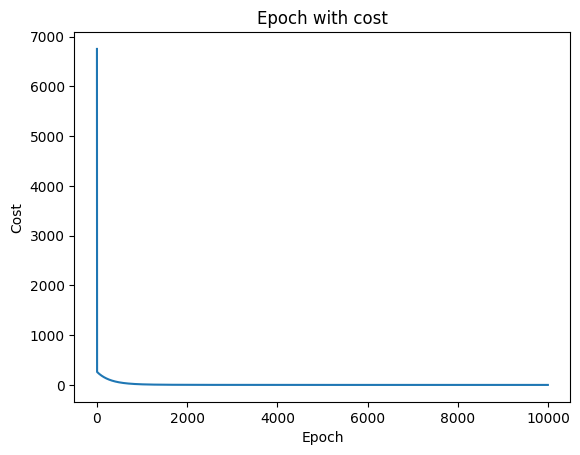

In [5]:
plt.plot(range(num_epochs), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Epoch with cost')
plt.show()

## Test model

In [6]:
test_data = torch.FloatTensor([[3.3, 700, 77, 84]])
predict = test_data.matmul(W) + b
pred_val = predict.squeeze().detach().numpy()
print('Total score is estimated %d' %(pred_val))

Total score is estimated 97
